In [1]:
%matplotlib inline

import dtreeviz
from feature_engine import encoding, imputation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import base, compose, datasets, ensemble, metrics, model_selection, pipeline, preprocessing, tree
import scikitplot
import xgboost as xgb
import yellowbrick.model_selection as ms
from yellowbrick import classifier

from src.helper import get_split_data

In [2]:
X_trn, y_trn, X_val, y_val, X_tst, y_tst = get_split_data.split_data_for_training(4)

# Combined Data for cross validation/etc
X = pd.concat([X_trn, X_val], axis='index')
y = pd.Series([*y_trn, *y_val], index=X.index)

In [3]:
xg_oob = xgb.XGBClassifier()
xg_oob.fit(X_trn, y_trn, verbose=False)
xg_oob.score(X_val, y_val)

0.8

In [4]:
xg_oob = xgb.XGBClassifier()
xg_oob.fit(X_trn, y_trn, verbose=False)
y_pred = xg_oob.predict(X_tst)
xg_oob.score(X_tst, y_tst)

0.6

In [5]:
xg2 = xgb.XGBClassifier(max_depth=2, n_estimators=2)
xg2.fit(X_trn, y_trn)
xg2.score(X_val, y_val)

0.6

In [6]:
xg2 = xgb.XGBClassifier(max_depth=2, n_estimators=2)
xg2.fit(X_trn, y_trn)
xg2.score(X_tst, y_tst)

0.7

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


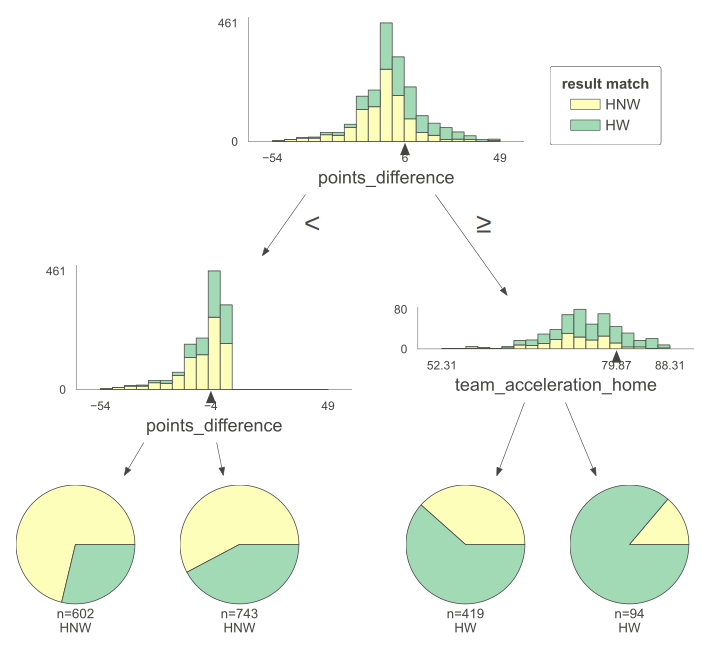

In [17]:
viz = dtreeviz.model(xg2, X_train=X, y_train=y, target_name='result match', feature_names=list(X_trn.columns),
                     class_names=['HNW', 'HW'], tree_index=1)
viz.view(depth_range_to_display=[0, 2], scale=2)

<Axes: >

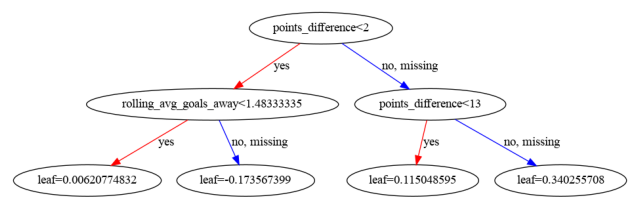

In [16]:
xgb.plot_tree(xg2, num_trees=0)

In [59]:
from sklearn.metrics import f1_score

xg = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss",
)

xg.fit(X_trn, y_trn, eval_set=[(X_trn, y_trn), (X_val, y_val)], verbose=False)
y_pred = xg.predict(X_tst)

f1_score(y_tst, y_pred).round(3)

np.float64(0.8)

In [ ]:
results = xg.evals_result()


val_0_logloss = results['validation_0']['logloss']
val_1_logloss = results['validation_1']['logloss']

min_val_0 = min(val_0_logloss)
idx_0 = val_0_logloss.index(min_val_0)
print(f"[validation_0] Min logloss = {min_val_0} at index {idx_0}")

min_val_1 = min(val_1_logloss)
idx_1 = val_1_logloss.index(min_val_1)
print(f"[validation_1] Min logloss = {min_val_1} at index {idx_1}")

Text(0.5, 0, 'ntrees')

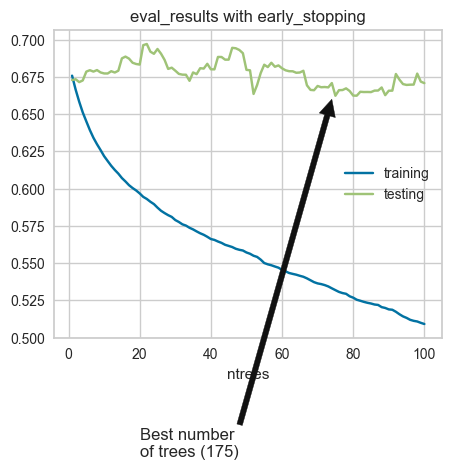

In [62]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = (pd.DataFrame({'training': results['validation_0']['logloss'],
                    'testing': results['validation_1']['logloss']})
      .assign(ntrees=lambda adf: range(1, len(adf) + 1))
      .set_index('ntrees')
      .plot(figsize=(5, 4), ax=ax,
            title='eval_results with early_stopping')
      )
ax.annotate('Best number \nof trees (175)', xy=(74, .66),
            xytext=(20, .42), arrowprops={'color': 'k'})
ax.set_xlabel('ntrees')

In [63]:
xg13 = xgb.XGBClassifier(n_estimators=74)
xg13.fit(X_trn, y_trn, eval_set=[(X_trn, y_trn), (X_val, y_val)], verbose=False)
f1_score(y_tst, y_pred).round(3)

np.float64(0.8)